In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3157,3158,15815236,Chiganu,574,Spain,Male,34,5,0.00,2,0,0,28269.86,0
8126,8127,15602647,Cunningham,729,Germany,Male,39,6,127415.85,1,1,1,184977.20,1
2141,2142,15758372,Wallace,674,France,Male,18,7,0.00,2,1,1,55753.12,1
9056,9057,15793311,Smith,765,Germany,Female,46,8,119492.88,2,0,1,166896.01,1
7129,7130,15781875,Jamieson,850,Spain,Male,33,3,100476.46,2,1,1,136539.13,0
4315,4316,15763980,Beneventi,632,Germany,Male,30,1,58668.02,1,1,1,78670.52,0
1772,1773,15756471,Giles,656,Germany,Male,27,4,118627.16,2,1,1,160835.30,0
6664,6665,15667632,Birdseye,703,France,Female,42,7,0.00,2,0,1,72500.68,0
49,50,15771873,Buccho,776,Germany,Female,37,2,103769.22,2,1,0,194099.12,0
5610,5611,15783816,Lori,733,France,Female,28,5,0.00,2,0,0,12761.16,0


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.shape

(10000, 14)

In [10]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [11]:
df.shape

(10000, 11)

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df=pd.get_dummies(df,columns=["Geography","Gender"])

In [14]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6924,668,43,1,147167.25,1,0,0,141679.73,0,0,0,1,0,1
1605,636,31,9,80844.69,2,1,1,74641.90,0,0,1,0,1,0
597,646,39,9,111574.41,1,1,1,30838.51,0,0,1,0,0,1
3333,619,41,5,92467.58,1,1,0,38270.47,0,0,1,0,1,0
5758,681,44,4,91115.76,2,0,0,24208.84,1,0,1,0,1,0
2903,568,47,7,0.00,2,1,1,45978.39,0,1,0,0,1,0
5179,760,34,6,121303.77,2,1,1,59325.21,0,0,1,0,0,1
8656,660,31,1,84560.04,1,1,1,137784.25,0,0,0,1,0,1
7207,520,30,4,145222.99,2,0,0,145160.96,0,0,0,1,1,0
2399,541,51,7,90373.28,2,1,0,179861.79,0,0,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:

X = df.drop(['Exited'], axis=1) 

y = df[['Exited']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
model_dtc = DecisionTreeClassifier(max_depth=6)

In [18]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [19]:
model_dtc.score(X_train,y_train)

0.8702857142857143

In [20]:
model_dtc.score(X_test,y_test)

0.85

VISUALIZATION

<Axes: xlabel='Exited', ylabel='count'>

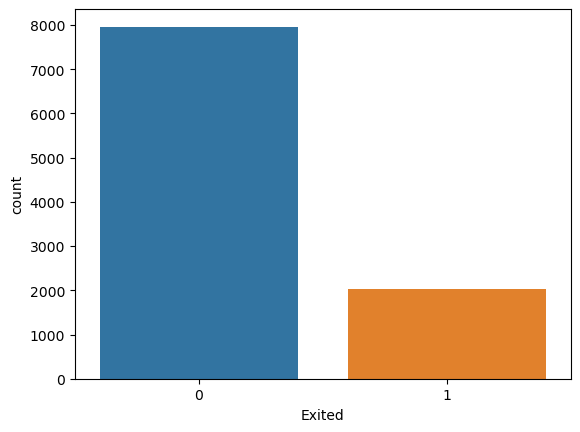

In [21]:
sns.countplot(x="Exited",data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

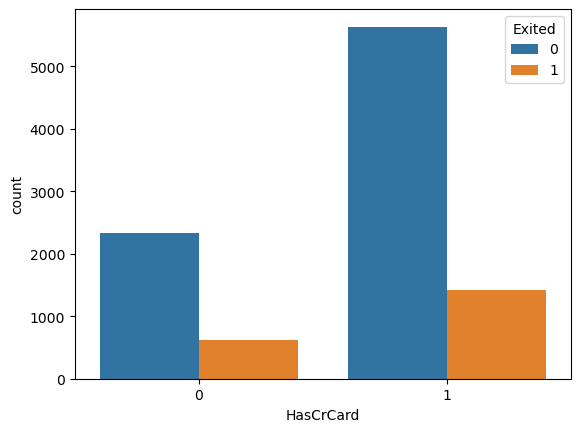

In [22]:
sns.countplot(x="HasCrCard",hue="Exited",data=df)

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
model_bc = BaggingClassifier(n_estimators=250,estimator=model_dtc,warm_start=True)

In [25]:
model_bc.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=250, warm_start=True)

In [26]:
model_bc.score(X_train,y_train)

0.8738571428571429

In [27]:
model_bc.score(X_test,y_test)

0.8556666666666667

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_abc = AdaBoostClassifier(learning_rate=5,n_estimators=500)


In [30]:
model_abc.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=5, n_estimators=500)

In [31]:
model_abc.score(X_train,y_train)

0.806

In [32]:
model_abc.score(X_test,y_test)

0.7936666666666666

In [33]:
model_gb = GradientBoostingClassifier()

In [34]:
model_gb.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [35]:
model_gb.score(X_train,y_train)

0.8761428571428571

In [36]:
8

8

In [37]:
model_rf = RandomForestClassifier()

In [38]:
model_rf.fit(X_train,y_train)
model_rf.score(X_train,y_train)

C:\Users\Premalatha\AppData\Local\Temp\ipykernel_17324\771388674.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


1.0

In [39]:
model_rf.score(X_test,y_test)

0.8526666666666667

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense

In [45]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=13))

classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=10,validation_split=0.1)




Epoch 1/10
630/630 [==============================] - 8s 7ms/step - loss: 0.5609 - accuracy: 0.7917 - val_loss: 0.5316 - val_accuracy: 0.8057
Epoch 2/10
630/630 [==============================] - 3s 5ms/step - loss: 0.5325 - accuracy: 0.7959 - val_loss: 0.5211 - val_accuracy: 0.8057
Epoch 3/10
630/630 [==============================] - 4s 6ms/step - loss: 0.5234 - accuracy: 0.7959 - val_loss: 0.4989 - val_accuracy: 0.8057
Epoch 4/10
630/630 [==============================] - 3s 5ms/step - loss: 0.5163 - accuracy: 0.7959 - val_loss: 0.4980 - val_accuracy: 0.8057
Epoch 5/10
630/630 [==============================] - 4s 6ms/step - loss: 0.5073 - accuracy: 0.7959 - val_loss: 0.4947 - val_accuracy: 0.8057
Epoch 6/10
630/630 [==============================] - 4s 7ms/step - loss: 0.5028 - accuracy: 0.7959 - val_loss: 0.4888 - val_accuracy: 0.8057
Epoch 7/10
630/630 [==============================] - 4s 6ms/step - loss: 0.4997 - accuracy: 0.7959 - val_loss: 0.4893 - val_accuracy: 0.8057
Epoch 